# Cleaning and Exploring Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('average-rainfall-temperature-1.csv', usecols=[0,6,7,8,9,10,11])

In [3]:
df.head()

,OrganisationName,GeoName,ReportingPeriodType,Year,Period,Rainfallmm,Temp
0,Lincolnshire,England E & NE,Monthly,2010,JAN,69.5,0.8
1,Lincolnshire,England E & NE,Monthly,2010,FEB,71.7,1.6
2,Lincolnshire,England E & NE,Monthly,2010,MAR,65.1,5.5
3,Lincolnshire,England E & NE,Monthly,2010,APR,21.4,8.2
4,Lincolnshire,England E & NE,Monthly,2010,MAY,22.1,9.8


In [4]:
df.shape

(170, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OrganisationName     170 non-null    object 
 1   GeoName              170 non-null    object 
 2   ReportingPeriodType  170 non-null    object 
 3   Year                 170 non-null    int64  
 4   Period               170 non-null    object 
 5   Rainfallmm           170 non-null    float64
 6   Temp                 170 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 9.4+ KB


In [6]:
df.dtypes

OrganisationName        object
GeoName                 object
ReportingPeriodType     object
Year                     int64
Period                  object
Rainfallmm             float64
Temp                   float64
dtype: object

### Basic Statistics

In [7]:
df.describe()

,Year,Rainfallmm,Temp
count,170.000000,170.000000,170.000000
mean,2014.500000,140.540588,9.300235
std,2.880767,179.608045,4.355358
min,2010.000000,10.300000,-1.200000
25%,2012.000000,52.625000,5.485000
50%,2014.500000,78.800000,9.320000
75%,2017.000000,147.900000,12.975000
max,2019.000000,1043.000000,17.800000


### Simple visualizations

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

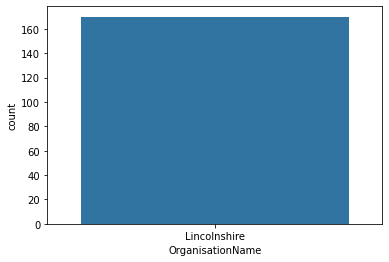

In [9]:
sns.countplot(df['OrganisationName'])

Per the graph above, all measurements are taken in the same region.

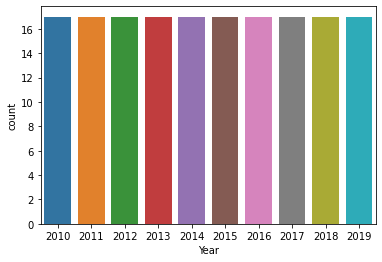

In [10]:
sns.countplot(df['Year'])

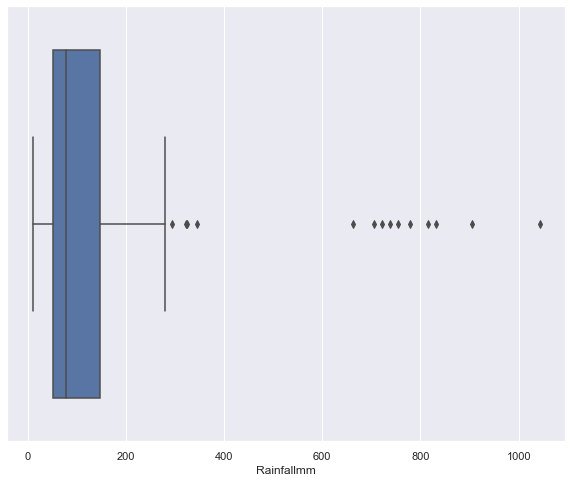

In [11]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.boxplot(x=df['Rainfallmm'])

In [12]:
month_df = df[df['ReportingPeriodType'] == 'Monthly']

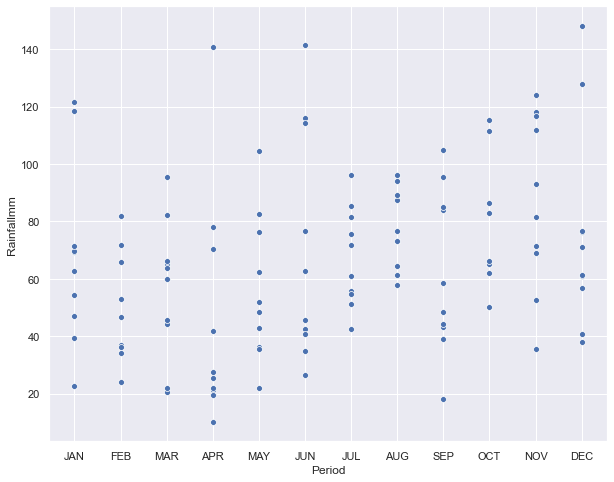

In [13]:
sns.scatterplot(x=month_df['Period'], y=month_df['Rainfallmm'])

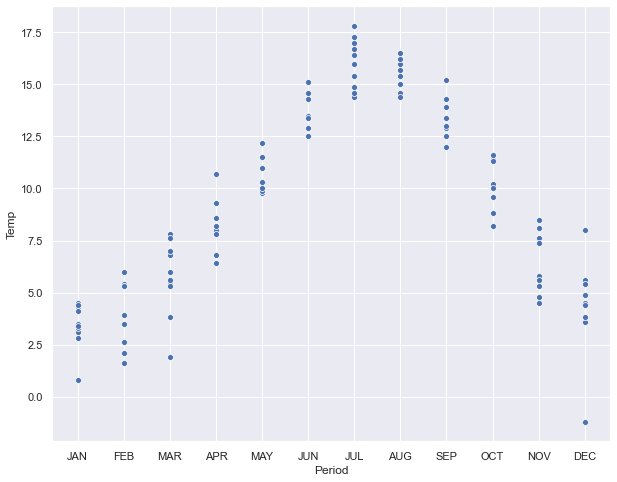

In [14]:
sns.scatterplot(x=month_df['Period'], y=month_df['Temp'])

### Evaluate for missing or incomplete data

In [15]:
month_df.isna().any()

OrganisationName       False
GeoName                False
ReportingPeriodType    False
Year                   False
Period                 False
Rainfallmm             False
Temp                   False
dtype: bool

In [16]:
df.isna().any()

OrganisationName       False
GeoName                False
ReportingPeriodType    False
Year                   False
Period                 False
Rainfallmm             False
Temp                   False
dtype: bool

In [17]:
month_df.count()

OrganisationName       120
GeoName                120
ReportingPeriodType    120
Year                   120
Period                 120
Rainfallmm             120
Temp                   120
dtype: int64

# Regression using Pandas

### Linear regression using month and temperature data

In [18]:
month_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_numbers = np.tile(month_numbers, 10)

In [19]:
pd.options.mode.chained_assignment = None
month_df['MonthNumbers'] = month_numbers;
month_df

,OrganisationName,GeoName,ReportingPeriodType,Year,Period,Rainfallmm,Temp,MonthNumbers
0,Lincolnshire,England E & NE,Monthly,2010,JAN,69.5,0.8,1
1,Lincolnshire,England E & NE,Monthly,2010,FEB,71.7,1.6,2
2,Lincolnshire,England E & NE,Monthly,2010,MAR,65.1,5.5,3
3,Lincolnshire,England E & NE,Monthly,2010,APR,21.4,8.2,4
4,Lincolnshire,England E & NE,Monthly,2010,MAY,22.1,9.8,5
...,...,...,...,...,...,...,...,...
160,Lincolnshire,England E & NE,Monthly,2019,AUG,89.1,16.5,8
161,Lincolnshire,England E & NE,Monthly,2019,SEP,104.9,13.4,9
162,Lincolnshire,England E & NE,Monthly,2019,OCT,115.4,8.8,10
163,Lincolnshire,England E & NE,Monthly,2019,NOV,124.0,5.6,11


In [20]:
from sklearn import datasets, linear_model

In [21]:
model1 = linear_model.LinearRegression()

In [22]:
xData = month_df['MonthNumbers'].to_numpy().reshape(-1, 1)
yData = month_df['Temp'].to_numpy().reshape(-1, 1)
model1.fit(xData,yData)

LinearRegression()

In [23]:
model1.score(xData,yData)

0.07959705083650226

### Quadratic regression using month and temperature data

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
quad_df = pd.concat([month_df['MonthNumbers'], month_df['Temp']], axis=1)

In [26]:
quad_df

,MonthNumbers,Temp
0,1,0.8
1,2,1.6
2,3,5.5
3,4,8.2
4,5,9.8
...,...,...
160,8,16.5
161,9,13.4
162,10,8.8
163,11,5.6


In [27]:
quad_arr = quad_df.to_numpy().reshape(120, 2)

In [28]:
poly = PolynomialFeatures(2)

In [29]:
poly.fit_transform(quad_arr)

array([[  1.  ,   1.  ,   0.8 ,   1.  ,   0.8 ,   0.64],
       [  1.  ,   2.  ,   1.6 ,   4.  ,   3.2 ,   2.56],
       [  1.  ,   3.  ,   5.5 ,   9.  ,  16.5 ,  30.25],
       [  1.  ,   4.  ,   8.2 ,  16.  ,  32.8 ,  67.24],
       [  1.  ,   5.  ,   9.8 ,  25.  ,  49.  ,  96.04],
       [  1.  ,   6.  ,  14.3 ,  36.  ,  85.8 , 204.49],
       [  1.  ,   7.  ,  16.4 ,  49.  , 114.8 , 268.96],
       [  1.  ,   8.  ,  14.6 ,  64.  , 116.8 , 213.16],
       [  1.  ,   9.  ,  13.4 ,  81.  , 120.6 , 179.56],
       [  1.  ,  10.  ,   9.6 , 100.  ,  96.  ,  92.16],
       [  1.  ,  11.  ,   4.5 , 121.  ,  49.5 ,  20.25],
       [  1.  ,  12.  ,  -1.2 , 144.  , -14.4 ,   1.44],
       [  1.  ,   1.  ,   3.1 ,   1.  ,   3.1 ,   9.61],
       [  1.  ,   2.  ,   5.4 ,   4.  ,  10.8 ,  29.16],
       [  1.  ,   3.  ,   6.  ,   9.  ,  18.  ,  36.  ],
       [  1.  ,   4.  ,  10.7 ,  16.  ,  42.8 , 114.49],
       [  1.  ,   5.  ,  11.5 ,  25.  ,  57.5 , 132.25],
       [  1.  ,   6.  ,  13.5 ,

### Linear regression using year and avg. rainfall temp data

In [30]:
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
year = np.array(year).reshape(-1, 1)

In [31]:
year1 = month_df[month_df['Year'] == 2010]
year2 = month_df[month_df['Year'] == 2011]
year3 = month_df[month_df['Year'] == 2012]
year4 = month_df[month_df['Year'] == 2013]
year5 = month_df[month_df['Year'] == 2014]
year6 = month_df[month_df['Year'] == 2015]
year7 = month_df[month_df['Year'] == 2016]
year8 = month_df[month_df['Year'] == 2017]
year9 = month_df[month_df['Year'] == 2018]
year10 = month_df[month_df['Year'] == 2019]

In [32]:
avg1 = year1['Temp'].mean()
avg2 = year2['Temp'].mean()
avg3 = year3['Temp'].mean()
avg4 = year4['Temp'].mean()
avg5 = year5['Temp'].mean()
avg6 = year6['Temp'].mean()
avg7 = year7['Temp'].mean()
avg8 = year8['Temp'].mean()
avg9 = year9['Temp'].mean()
avg10 = year10['Temp'].mean()

In [33]:
avg_rain_temp = [avg1, avg2, avg3, avg4, avg5, avg6, avg7, avg8, avg9, avg10]
avg_rain_temp = np.array(avg_rain_temp).reshape(-1, 1)

In [34]:
model2 = linear_model.LinearRegression()

In [35]:
model2.fit(year, avg_rain_temp)

LinearRegression()

In [36]:
model2.score(year, avg_rain_temp)

0.2746916452136605

In [37]:
model2.coef_

array([[0.09878788]])

# Making a prediction based on year

### What will the avg. rainfall temp be in the year 2020?

In [38]:
model2.predict(np.array([2020]).reshape(-1,1))

array([[9.84666667]])

### What will the avg. rainfall temp be in the year 2022?

In [39]:
model2.predict(np.array([2022]).reshape(-1,1))

array([[10.04424242]])

# Conclusion

As can be seen in the prediction section above, the line of best fit predicts that the average rainfall temperature in 2020 will be 9.847 degrees Centigrade or Celsius, and that of 2022 will be 10.044 degrees C. Even with the general warming of the planet, this would be a very drastic change to observe in the span of two years, so it doesn't bear a very high confidence level. One reason for the possible inaccuracy of this data is the low number of data points. The trendline is determined from just 10 datapoints; the more that are added, the more apparent the relationship (or lack thereof) and the better calibrated the trendline become. This is especially important given that 10 years (over which the 10 data points were collected) is a very limited time when it comes to observing temperature trends. Were I to conduct multiple regression for this dataset, I would test whether or not the avg. rainfall temp is dependent upon both month and year. This way, the data would not be as affected by outliers as it currently is.